In [1]:

!pwd
#/tf/capstone2/src

/tf/capstone2/data/app/breast-cancer-cnn/notebooks


In [4]:
cd ..

/tf/capstone2/data/app/breast-cancer-cnn


In [5]:
cd src/

/tf/capstone2/data/app/breast-cancer-cnn/src


In [15]:
from image_pipeline import *
from image_convolv import *
from bc_plotting import *
from bc import *

In [16]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [8]:
#imgs = get_images()


In [17]:
#root_dir = '../data/BreaKHis_v1/histology_slides/breast'
#image_size = (153, 234, 3) # (456, 700, 3) # ( 153, 234, 3)

#ip = read_images(root_dir, ['200X'])
#ip.resize(shape = image_size)
brief_mode = False
ip = run_pipeline(brief_mode=False) # sets ip images_filename_list, and images_list

TypeError: run_pipeline() got an unexpected keyword argument 'brief_mode'

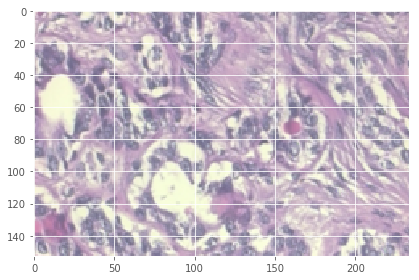

{'biopsy_procedure': 'SOB',
 'image_size': (460, 700, 3),
 'mag': '200',
 'seq': '001',
 'slide_id': '9133',
 'tumor_class': 'B',
 'tumor_type': 'F',
 'year': '14'}

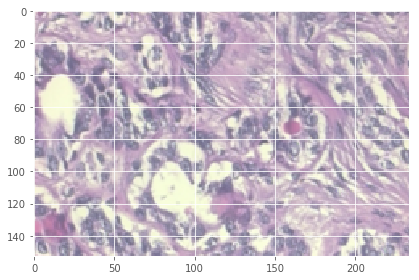

In [7]:
idx = 13
img1 = ip.get_image(idx)
io.imshow(img1)

ip.images_filename_list[idx]
ip.images_attributes[ip.images_filename_list[idx]]
# nice benign example

In [8]:
#imgs.keys()

In [9]:
#plot_images(imgs, save_title='question2.png', show = True)

In [10]:
ip.vectorize() 
ip.images_attributes

images_list len 82 
shape of np array converted images_list going in (82, 153, 234, 3)
features shape (82, 153, 234, 3)
attribs (dict) len 82
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '13412', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'tumor_class': 'M'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '17614', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'tumor_class': 'M'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '15275', 'biopsy_procedure': 'SOB', 'tumor_type': 'TA', 'tumor_class': 'B'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '22549CD', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'tumor_class': 'B'}
{'seq': '002', 'mag': '200', 'image_size': (460, 700, 3), 'year': '14', 'slide_id': '6241', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'tumor_class': 'M'}
{'seq': '001', 'mag': '200', 'image_size': (460, 700, 3), 

{'SOB_B_A-14-22549AB-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549AB',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549CD-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549G-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549G',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-29960CD-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '29960CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_F-14-14134-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '14134',
  'tumor_cl

getting sample of type PC
found fn SOB_M_PC-14-15687B-200-001.png at index [77]


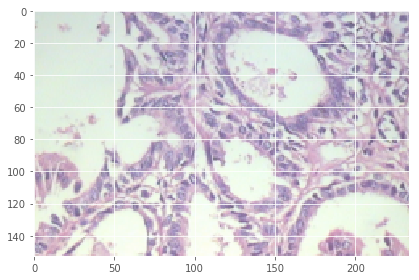

getting sample of type F
found fn SOB_B_F-14-14134E-200-001.png at index [5]


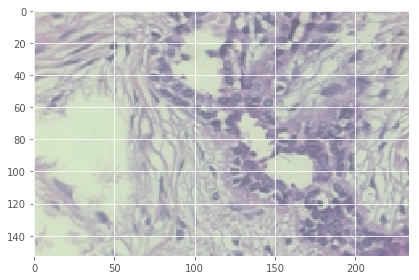

getting sample of type PT
found fn SOB_B_PT-14-22704-200-001.png at index [15]


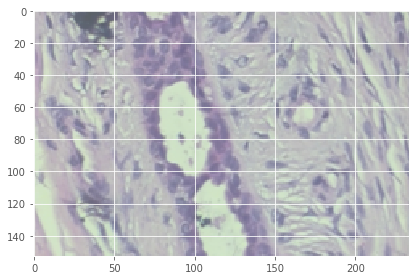

getting sample of type MC
found fn SOB_M_MC-14-19979C-200-001.png at index [75]


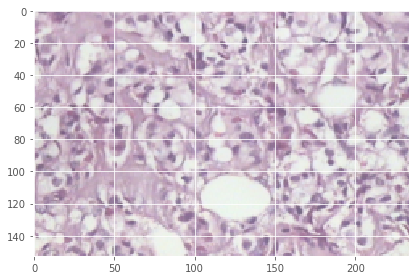

getting sample of type DC
found fn SOB_M_DC-14-13412-200-001.png at index [29]


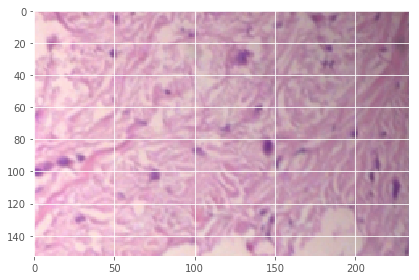

getting sample of type TA
found fn SOB_B_TA-14-15275-200-001.png at index [18]


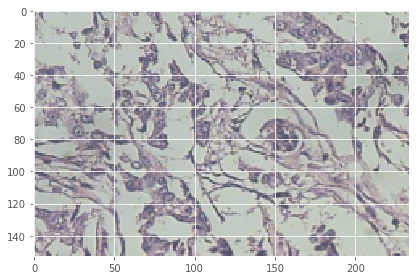

getting sample of type A
found fn SOB_B_A-14-22549CD-200-001.png at index [1]


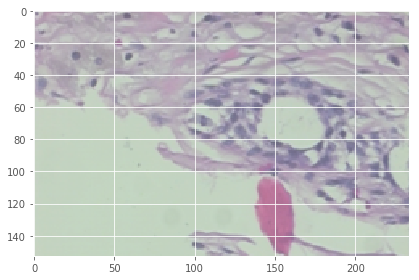

getting sample of type LC
found fn SOB_M_LC-14-12204-200-006.png at index [62]


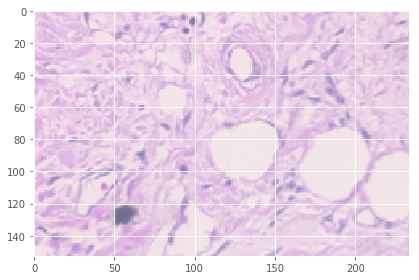

In [11]:
img_d8 = ip.get_one_of_each()

In [19]:
# get only the 4 malignant ones


getting sample of type A
found fn SOB_B_A-14-22549CD-200-001.png at index [1]


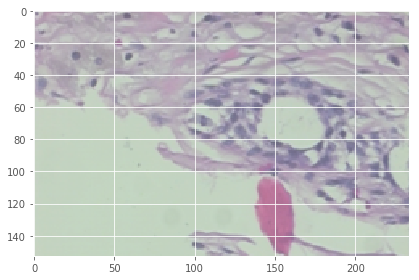

getting sample of type F
found fn SOB_B_F-14-14134E-200-001.png at index [5]


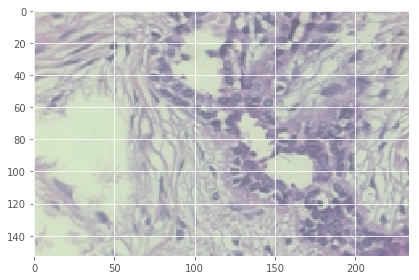

getting sample of type PT
found fn SOB_B_PT-14-22704-200-001.png at index [15]


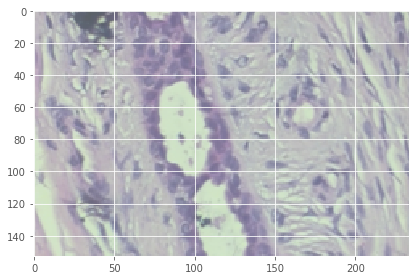

getting sample of type TA
found fn SOB_B_TA-14-15275-200-001.png at index [18]


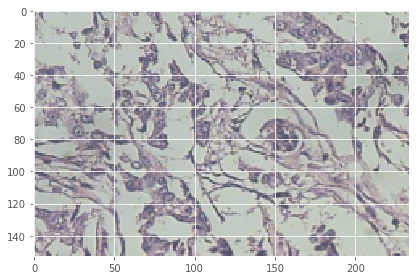

getting sample of type PC
found fn SOB_M_PC-14-15687B-200-001.png at index [77]


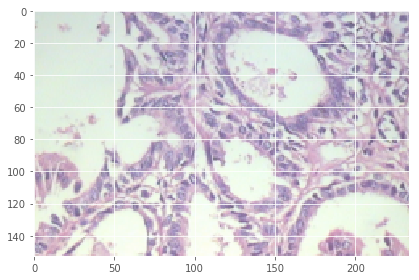

getting sample of type LC
found fn SOB_M_LC-14-12204-200-006.png at index [62]


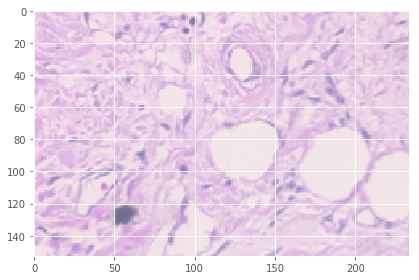

getting sample of type MC
found fn SOB_M_MC-14-19979C-200-001.png at index [75]


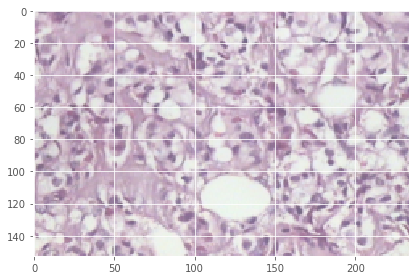

getting sample of type DC
found fn SOB_M_DC-14-13412-200-001.png at index [29]


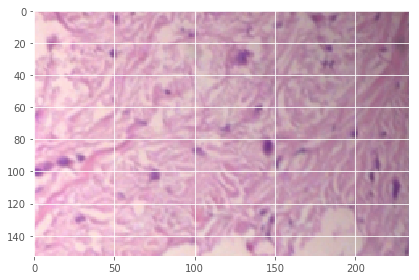

In [12]:

img_d_b = ip.get_one_of_each('B')
img_d_m = ip.get_one_of_each('M')

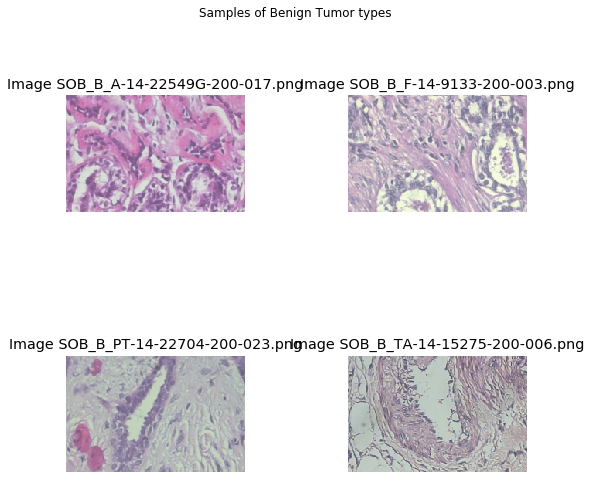

In [21]:
plot_images(img_d_b, Title='Samples of Benign Tumor types');

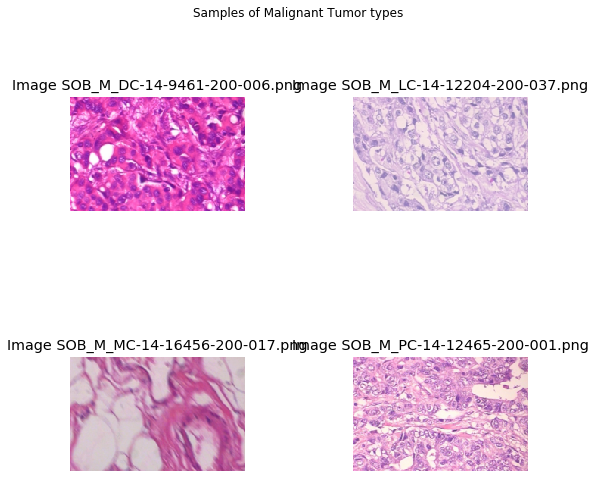

In [22]:
#tumor_types = {'DC', 'LC', 'MC', 'PC', 'A', 'F', 'PT', 'TA'}
plot_images(img_d_m, Title='Samples of Malignant Tumor types');

In [23]:
#imgs_m = imgs[:4, :, :, :]
#plot_images(imgs_m, Title='Samples of Tumor types', labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT']);

In [13]:
type(img_d_m)


dict

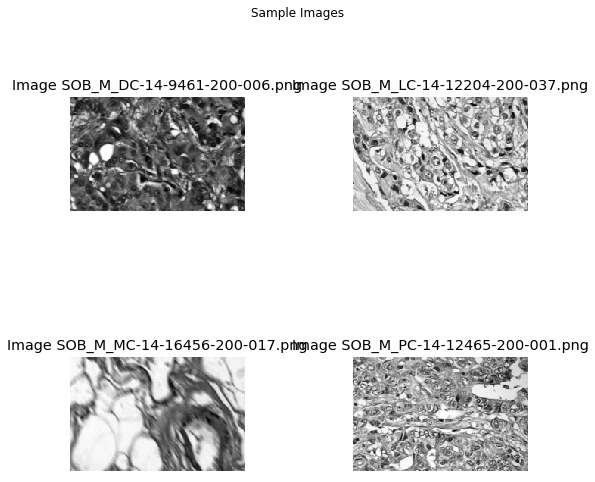

In [24]:

gray_imgs = get_grayscale(img_d_m)
plot_images(gray_imgs);

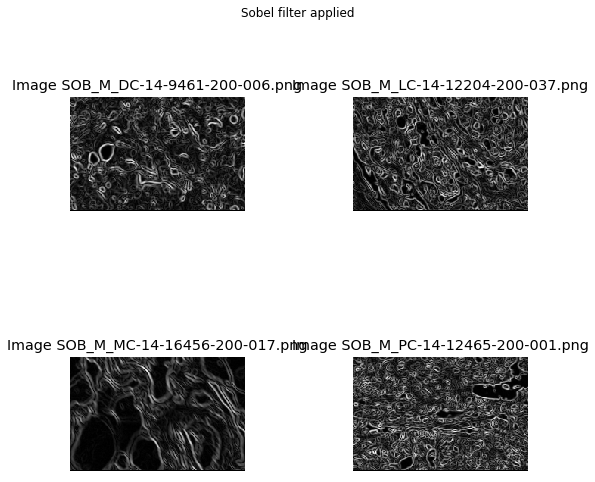

In [25]:

sobel_imgs = apply_filter(gray_imgs, img_filter = sobel, save_title='sobel_imgs.png', show_bool = False)
plot_images(sobel_imgs, Title = "Sobel filter applied") #, labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC']);

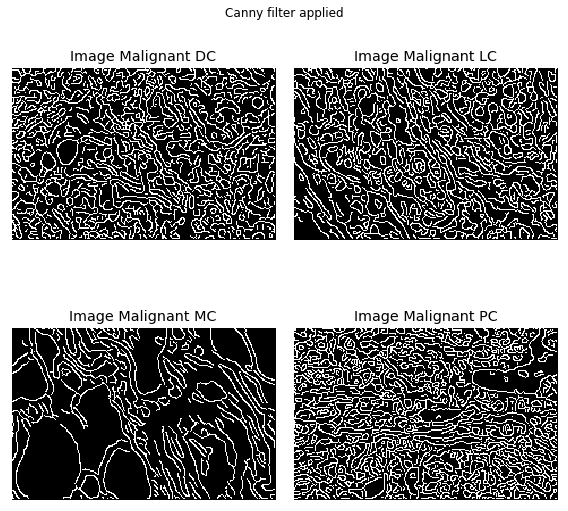

In [26]:
canny_imgs = apply_filter(gray_imgs, img_filter = canny, save_title='canny_imgs.png', show_bool = False)
plot_images(canny_imgs, Title = "Canny filter applied", labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC']);
# Not helpful b/c nuclei are lost

Sigma: 0
Sigma: 0


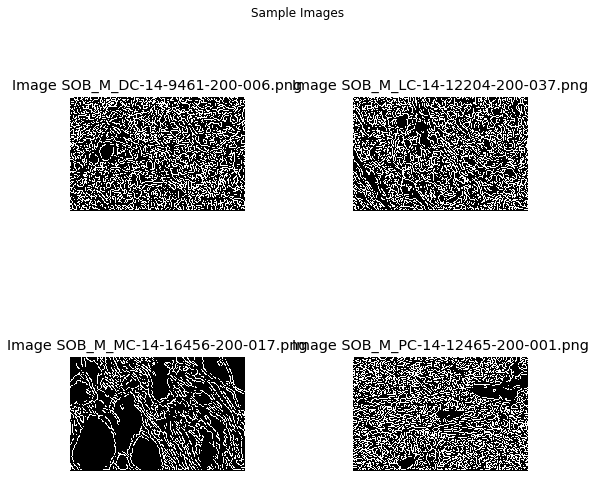

Sigma: 1
Sigma: 1


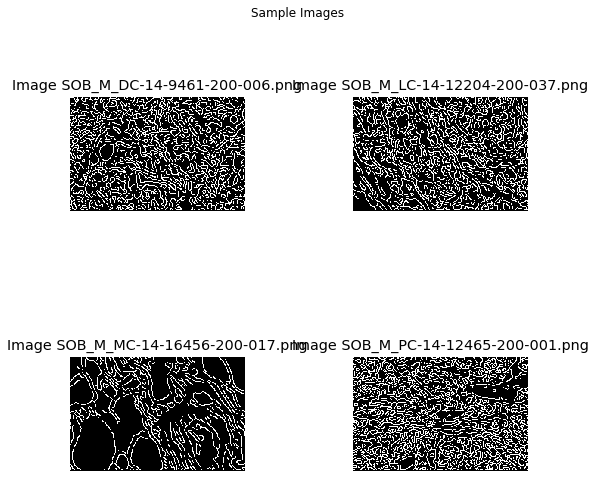

Sigma: 2
Sigma: 2


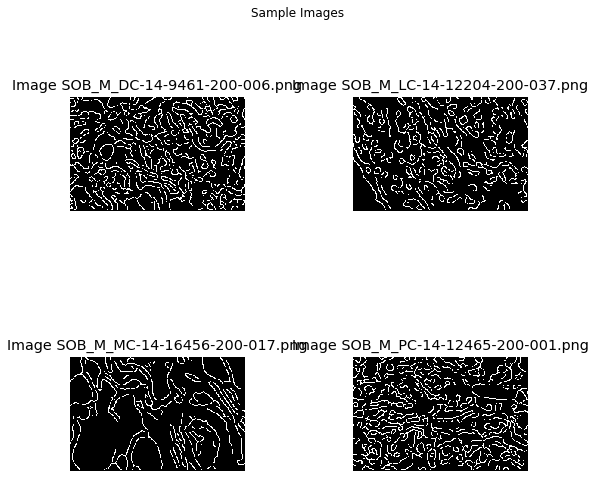

Sigma: 3
Sigma: 3


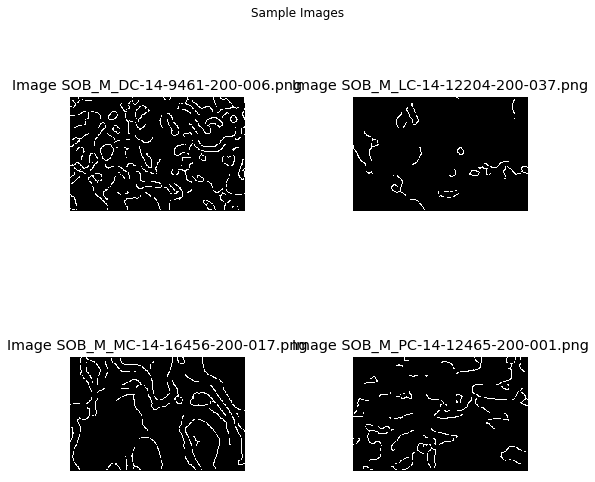

Sigma: 4
Sigma: 4


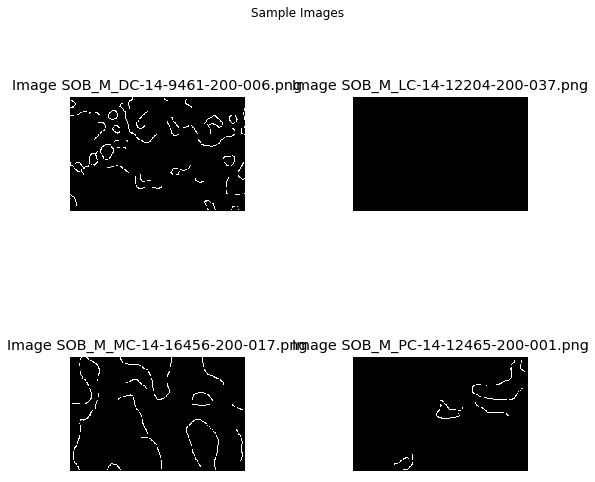

In [27]:
test_canny_sigma(gray_imgs)

tv_chambolle denoising
Chambolle weight: 0.3


<Figure size 432x288 with 0 Axes>

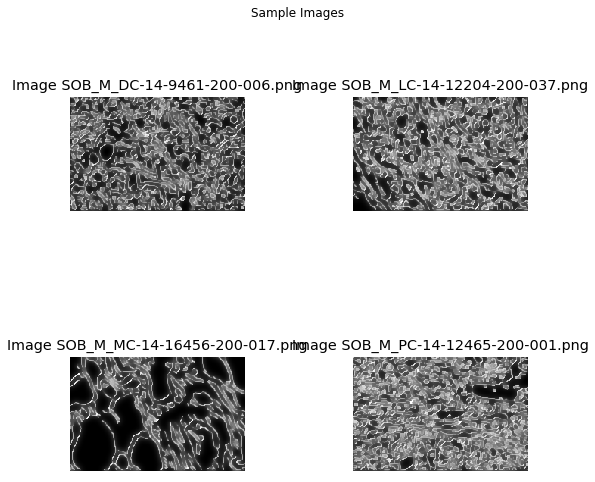

Chambolle weight: 0.8400000000000001


<Figure size 432x288 with 0 Axes>

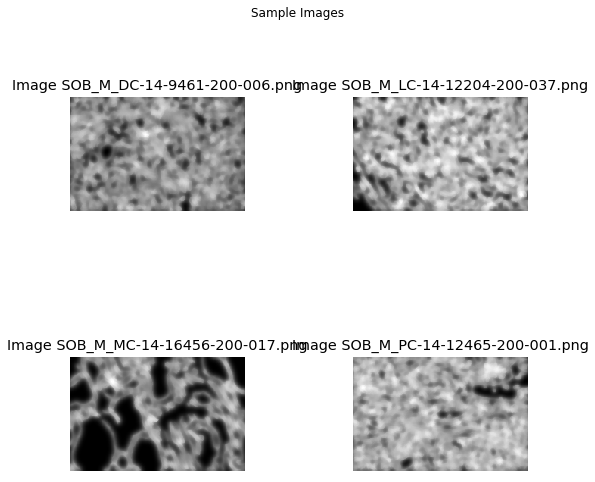

Chambolle weight: 1.3800000000000001


<Figure size 432x288 with 0 Axes>

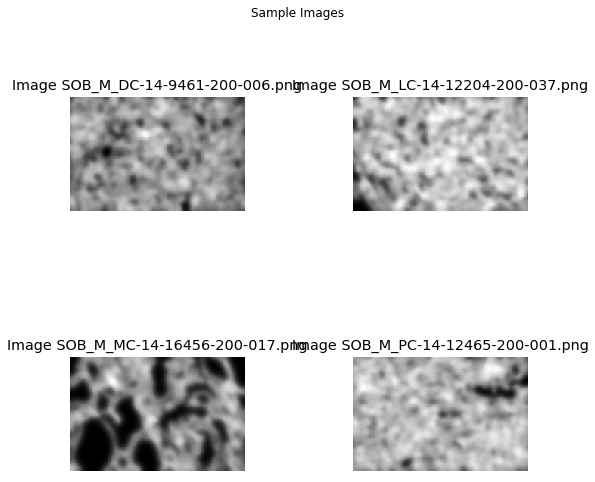

Chambolle weight: 1.9200000000000002


<Figure size 432x288 with 0 Axes>

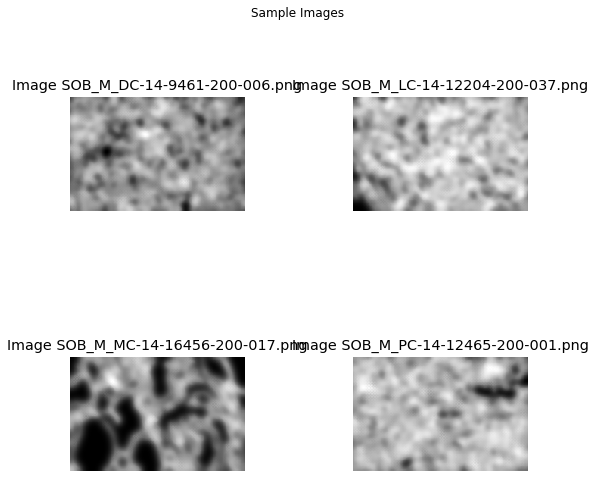

Chambolle weight: 2.46


<Figure size 432x288 with 0 Axes>

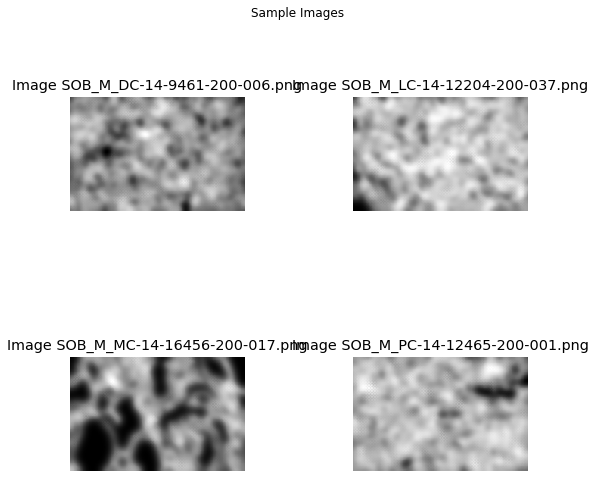

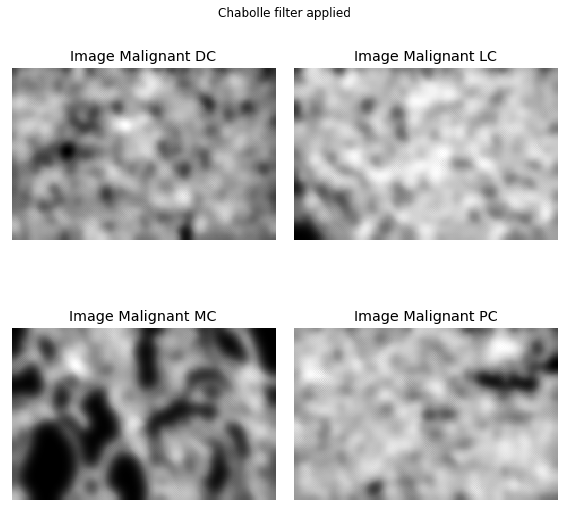

In [28]:
imgs_den = test_denoise(gray_imgs, denoise = denoise_tv_chambolle, save_title='denoise_chambolle.png', show_bool = True)
#tv_chambolle denoising
#Sigma 1, spatial: 0.3 is pretty nice
plot_images(imgs_den, Title = "Chabolle filter applied", labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC'])

bilateral denoising
Sigma, spatial: 0.2


<Figure size 432x288 with 0 Axes>

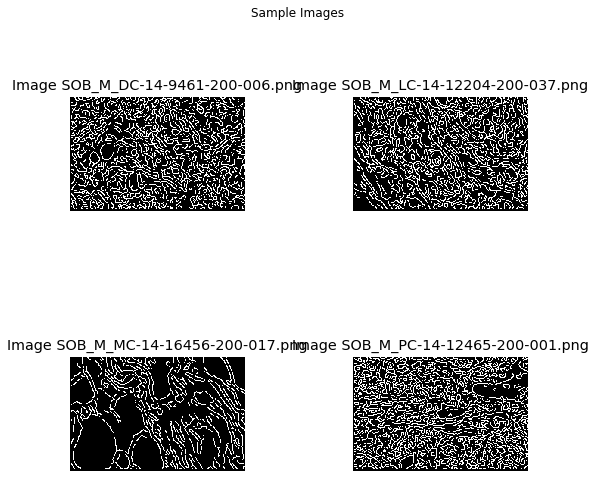

Sigma, spatial: 0.4


<Figure size 432x288 with 0 Axes>

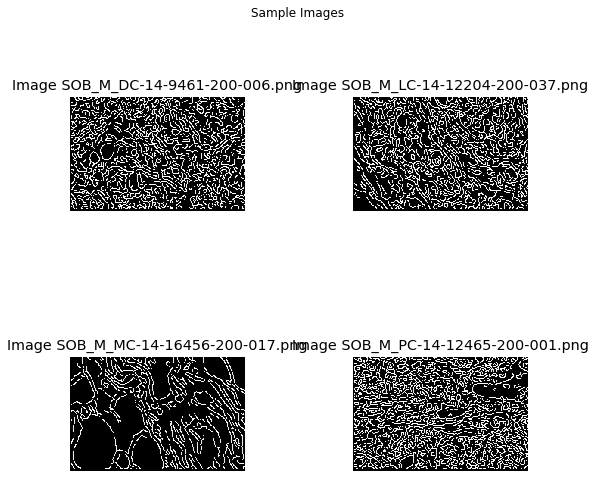

Sigma, spatial: 0.6000000000000001


<Figure size 432x288 with 0 Axes>

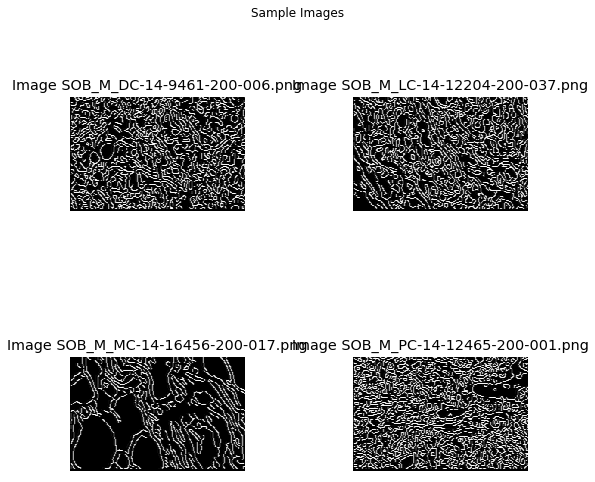

Sigma, spatial: 0.8


<Figure size 432x288 with 0 Axes>

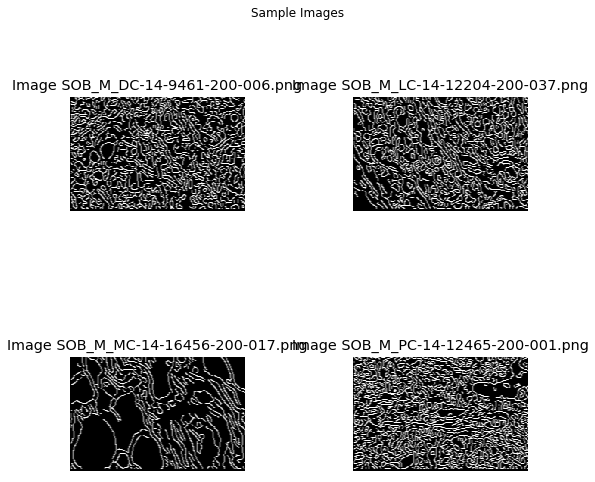

In [29]:
imgs_den_bilat = test_denoise(gray_imgs, denoise = denoise_bilateral, save_title='denoise_bilateral.png', show_bool = True)

# Looks like illustration

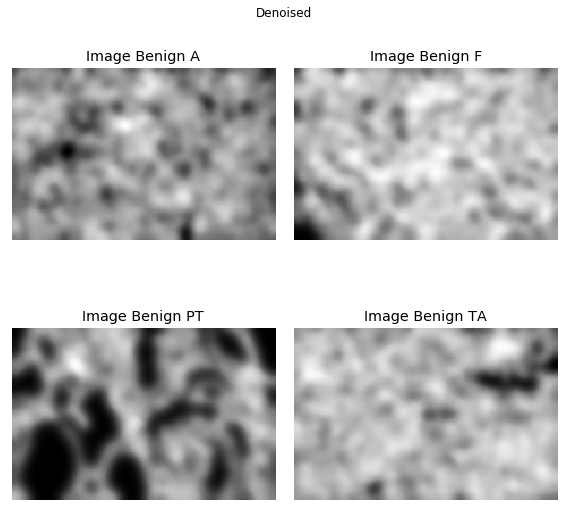

In [30]:
plot_images(imgs_den, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT'], Title = 'Denoised');



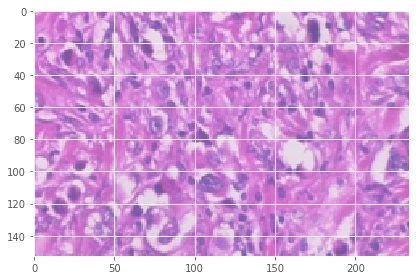

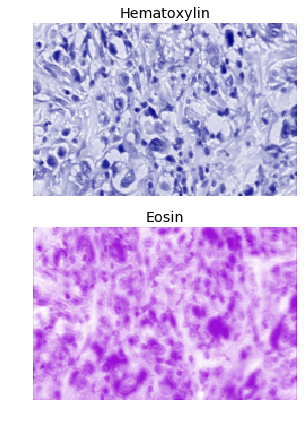

In [31]:
#imgs_bilat = test_denoise(gray_imgs, denoise = denoise_bilateral, save_title='denoise_bilateral.png', show_bool = True)
#single image dye sep
img_m1 = ip.get_image(ip.images_filename_list.index('SOB_M_DC-14-4372-200-001.png'))
ihc_hed = dye_color_separation(img_m1)


ax = plot_dye_separation(img_m1, ihc_hed)

In [32]:
#dye_sep_imgs = apply_filter(img_d_m, img_filter = dye_color_separation, save_title='dye_imgs.png', show_bool = False)
#plot_images(dye_sep_imgs, Title = "Dye filter applied", labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC']);

In [11]:
# CNN without building
model = keras.models.load_model('../models/saved_model.h5')
type(model)


tensorflow.python.keras.engine.sequential.Sequential

In [35]:

features = ip.features
target = ip.tumor_class_vector
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state=1)


In [12]:
cnn = CNN()
cnn.model = model

In [39]:

score = cnn.model.evaluate(X_test, y_test, verbose=1)

W1204 16:39:42.297310 140436944353024 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [40]:
score

[0.8288278544215352, 0.3300248]

AttributeError: 'CNN' object has no attribute 'history'

In [48]:
plot_training_results(history, 10)

In [49]:
type(cnn.history)

tensorflow.python.keras.callbacks.History

In [45]:
cnn.fit(X_train, X_test, y_train, y_test)
cnn.load_and_featurize_data()
cnn.fit_model( batch_size=batch_size, epochs=nb_epoch, verbose=1, data_augmentation=True)

What do X_train, X_test, y_train, y_test look like (1610, 153, 234, 3) (403, 153, 234, 3) (1610,) (403,)
How many train ben/malig 1120 out of total 1610
How many test ben/malig 270 out of total 403
X_train shape: (1610, 153, 234, 3)
1610 train samples
403 test samples
Epoch 1/10
51/51 [==============================] - 289s 6s/step - accuracy: 0.3043 - loss: 0.8390 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.8085
Epoch 2/10
51/51 [==============================] - 297s 6s/step - accuracy: 0.3043 - loss: 0.8315 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.8028
Epoch 3/10
51/51 [==============================] - 296s 6s/step - accuracy: 0.3043 - loss: 0.8248 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.7972
Epoch 4/10
51/51 [==============================] - 251s 5s/step - accuracy: 0.3043 - loss: 0.8184 - batch: 25.0000 - size: 31.5686 - val_accuracy: 0.3542 - val_loss: 0.7918
Epoch 5/10
51/51 [=================

In [47]:
cnn.history

In [50]:
plot_training_results(history, 10)

In [51]:

def plot_training_results(history, epochs):
    if history is None:
        return
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

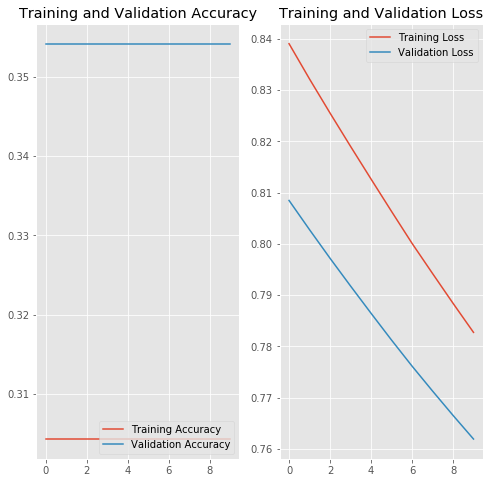

In [52]:
plot_training_results(cnn.history, 10)